# Homework 1

## Part 1: Conceptual exercises

** 1. In 2-4 sentences, differentiate “Data Science” and “Big Data”, and also tell how they are related. **

Data science is a set of fundamental principles that guide the extraction of knowledge from data. Big data essentially means datasets that are too large for traditional data processing systems, and therefore require new processing technologies. Big data technologies are used for many tasks, including data engineering. They are related because, occasionally, big data technologies are actually used for implementing data mining\* techniques. However, much more often the well-known big data technologies are used for data processing in support of the data mining techniques and other data science activities,

\*Data mining is the extraction of knowledge from data, via technologies that incorporate these principles. 

** 2. MTC (MegaTelCo) has decided to use supervised learning to address its problem of churn in its wireless phone business.  As a consultant to MTC, you realize that a main task in the business understanding/data understanding phases of the data mining process is to define the target variable.  In one or two sentences, please suggest a definition for the target variable.  Be as precise as possible—someone else will be implementing your suggestion.  (Remember: it should make sense from a business point of view, and it should be reasonable that MTC would have data available to know the value of the target variable for historical customers.) **

Sample answer:
For our initial analysis, we will focus on individual customers as our instances and will be focusing on the question of churn following contract expiration.  We will define the (binary) target variable as: will/will not the customer in question still be using (and paying for) our service 90 days after contract expiration.  We will know this for historical customers whose contract expired more than 90 days ago.  We will predict this for other customers.

Important aspects of an answer: You should understand what the target variable is and define it in a precisely enough manner such that your suggestion could be implemented. For example: just “whether the customer leaves” is not precise.  Even whether the customer leaves after contract expiration isn’t precise (instantaneously?  Within 10 years?). Note that the target variable need not be binary: one might decide to estimate what is the time between contract expiration and the last payment a customer makes (or the last call a customer makes).  


## Part 2: Graduate admissions case study

You've been hired by Hudson University as a data analyst for the Graduate Admissions Department. Since the admission process is long and tedious, it often results in a bottleneck for other subsequent tasks, such as planning the necessary resources to accommodate the admitted students (e.g. housing, classes, etc). You have been asked to build a model to predict which students will be admitted using the following historical data: 

1. Serial No. (serves as unique identifier)
2. GRE Scores (out of 340) 
3. TOEFL Scores (out of 120) 
4. University Rating (out of 5).
5. Statement of Purpose Strength (out of 5)
6. Letter of Recommendation Strength (out of 5) 
7. Undergraduate GPA (out of 10) 
8. Research Experience (either 0 or 1) 
9. Chance of Admit (ranging from 0 to 1)

The chances of admit for the applicants in your data were assessed by an expert. Given that this list of application attributes would be available early in the admission process for future applications (except for Chance of Admit), a model predicting chances of admit would allow planning tasks to start earlier.

In [2]:
# Some libraries you may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Trick to display plots inline with the rest of your notebook.
%matplotlib inline

# Path to data containing past applications
data_path = "./data/data-hw1.csv"

** 1. Load the data referenced by the path above into a pandas data frame. Print the number of rows and columns in the dataset. **

In [3]:
# Put your answer here.
df = pd.read_csv(data_path)
print(df.shape)

(500, 9)


(Optional) Rename the columns in the dataframe to manipulate the data more easily. No extra points for this, but it might make your life easier.

In [3]:
# Put your (optional) answer here.
df.rename(
    columns={
        "Serial No.": "ID",
        "GRE Score": "GRE",
        "TOEFL Score": "TOEFL",
        "University Rating": "Rating",
        "SOP": "SOP",
        "LOR": "LOR",
        "CGPA": "GPA",
        "Research": "Research",
        "Chance of Admit": "Admit"
    },
    inplace=True)
# Or this if you know the order of the columns:
# df.columns = ["ID", "GRE", "TOEFL", "Rating", "SOP", "LOR", "CGPA", "Research", "Admit"]
df.head()

,ID,GRE,TOEFL,Rating,SOP,LOR,GPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


** 2. Show descriptive statistics for all columns. **

In [4]:
# Put your answer here.
df.describe()

,ID,GRE,TOEFL,Rating,SOP,LOR,GPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


(Optional 2) Drop the column "Serial No". Again, no extra points for this, but it might be helpful to visualize things later on.

In [5]:
# Put your (optional) answer here.
df.drop("ID", inplace=True, axis="columns")

** 3. What is the distribution of the chances of admit? Plot an histogram of this variable. **

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A9B30D358>]],
      dtype=object)

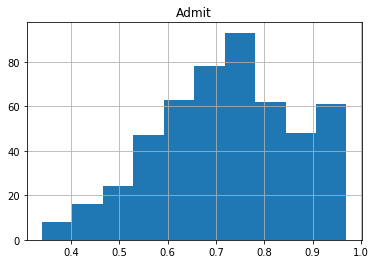

In [6]:
# Put your answer here.
df.hist("Admit")

** 4. Chances of admit seem to vary quite a bit. How much of this depends on the quality of the university that the applicant attended? Print the average chance of admit per university rating. **

In [7]:
# Put your answer here.
df.groupby("Rating").Admit.mean()

Rating
1    0.562059
2    0.626111
3    0.702901
4    0.801619
5    0.888082
Name: Admit, dtype: float64

** 5. Does the distribution of chances of admit change with university rating? Plot an histogram of chances of admit for each university rating. **

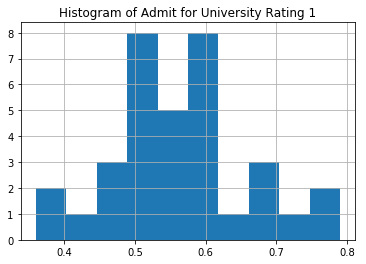

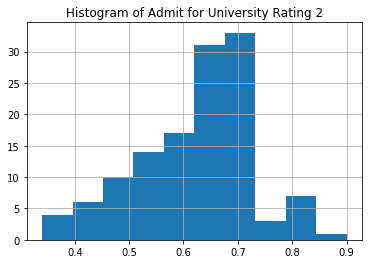

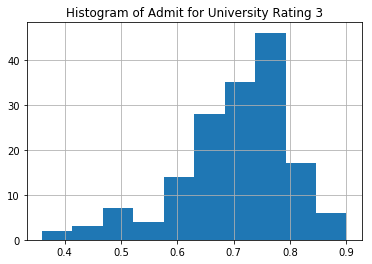

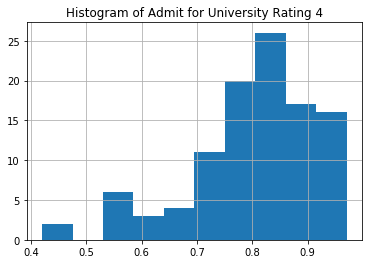

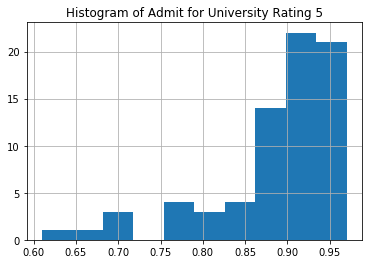

In [8]:
# Put your answer here.
for rating in np.sort(df.Rating.unique()):
    hist = df[df.Rating == rating].hist("Admit")
    plt.title("Histogram of Admit for University Rating {0}".format(rating))

** 6. Another way to look at the relationship between two variables is through scatter plots. Plot a scatter plot between GRE and chance of admit. **

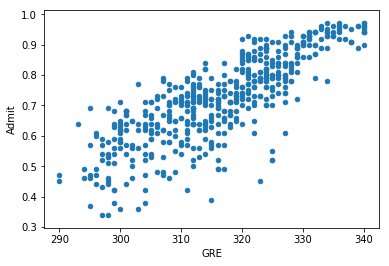

In [9]:
# Put your answer here.
df.plot.scatter("GRE", "Admit")

** 7. Boxplots are also useful to look at the relationship between a categorical variable and a numeric variable. Plot a boxplot of chance of admit grouped by "Research". **

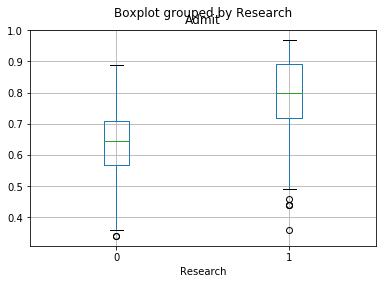

In [10]:
# Put your answer here.
df.boxplot("Admit", "Research")

** 8. Very often it is useful to quantify how strong is the relationship between different variables. For example, measures of correlation, such as Pearson's correlation coefficient, can show whether one numeric variable gives information on another numeric variable. Pandas allows us to compute the Pearson correlation coefficient between all pairs of columns in our dataframe. Display the correlations between all pairs of columns. **

In [11]:
# Put your answer here.
df.corr()

,GRE,TOEFL,Rating,SOP,LOR,GPA,Research,Admit
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
GPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


** 9. Heatmaps are a tool for conveniently visualizing correlation data. Plot these correlations as a seaborn heatmap. Which pairs of variables are most closely correlated? Which variable gives the most information on chance of admit? **

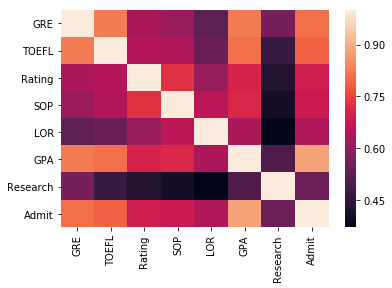

In [12]:
# Put your answer here.
sns.heatmap(df.corr())

** 10. Following the example in class, build a linear model to predict the chance of admit using the application info available. Generate predictions and compare predicted quality to the actual value in a scatter plot. **

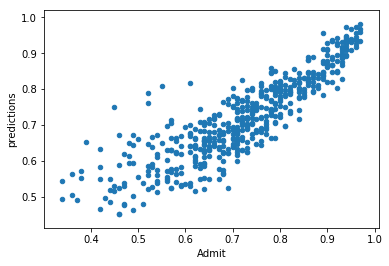

In [13]:
# Put your answer here.
from sklearn.linear_model import Lasso 

target = "Admit"
features = [c for c in df.columns if c != target]

def print_predictions(model):
    model.fit(df[features], df[target])
    pred = model.predict(df[features])
    df_with_pred = df.assign(predictions = pred)
    df_with_pred.plot.scatter("Admit", "predictions")
    
lasso_model = Lasso(alpha=0.01)
print_predictions(lasso_model)

** 11. There are many different types of predictive models, each with their own plusses and minuses. For this task, repeat your modeling performed in step 8, but using a sklearn.ensemble.RandomForestRegressor. How does the scatter plot compare with the prior results? **

C:\Users\ferlo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


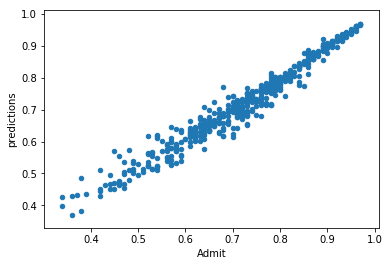

In [14]:
# Put your answer here.
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
print_predictions(forest_model)